<center><h1>Assignment 4</h1></center>




- **Name: Udit Singh**
- **Roll No: 2018IMT-101**
- **Course: Machine Learning Lab**
- **Course Code: ITIT-4107**
- **Deadline: 18 October 2021**

Importing necessary library for generating datasets and implementing the linear and polynomial models.

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Downloadind the dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AlfTang/Linear-Regression/master/ex1data1.txt",names = ['population','profit'],header = None)

Exploring the dataset

In [3]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


# Exploratory Data Analysis

Text(0, 0.5, 'Profit')

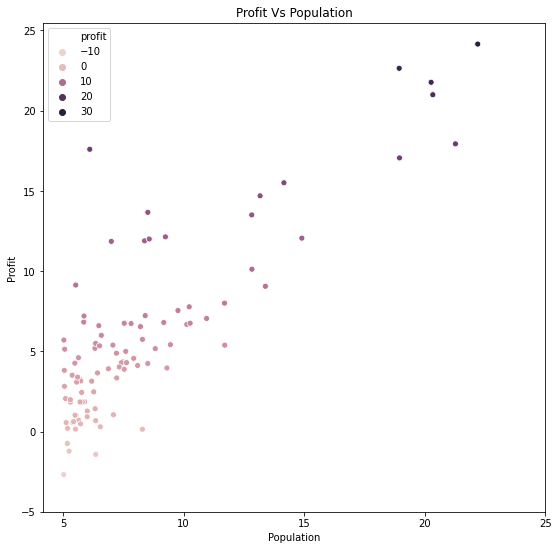

In [6]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df,x=df['population'],y=df['profit'],hue="profit")
plt.title("Profit Vs Population")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population")
plt.ylabel("Profit")

Defining Compute,Gradient Descent and plot functions

In [7]:
# Function to compute the cost from predictions
sns.set()
alphas = np.arange(0.001, 0.02, 0.002)
j_vals =[]

print("Batch of Alpha Values to be used: ({})".format(len(alphas)), alphas)


def calCost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)
# Function to compute the gradient descent
def gradD(X,y,theta,alpha,num_iters):
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(calCost(X,y,theta))
    
    return theta, J_history

#Function to plot the line of fit against the scatter plot
def plotLineonScatter(al,th):
    fig = plt.figure(figsize=(6,6))
    sns.scatterplot(data=df,x=df['population'],y=df['profit'],hue="profit")
    plt.title("Profit vs Population with alpha = {}\n".format(al))
    x_value=[x for x in range(25)]
    y_value=[y*th[1]+th[0] for y in x_value]
    plt.plot(x_value,y_value,color="r")
    plt.xlabel("Population")
    plt.ylabel("Profit")
    plt.xticks(np.arange(5,30,step=5))
    plt.yticks(np.arange(-5,30,step=5))
    

# Function to calculate the required batch observations for step 1,2,3
def func(i):
  theta=np.zeros((2,1))
  alpha = alphas[i]
  theta,J_history = gradD(X,y,theta,alpha,100)
  print('The learning rate(alpha): {}'.format(alpha))
  print('THETA: {}'.format(theta))
  print('\n Expression of Hypothesis Function:')
  print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")
  j_vals.append(J_history)
  plotLineonScatter(alpha,theta)



Batch of Alpha Values to be used: (10) [0.001 0.003 0.005 0.007 0.009 0.011 0.013 0.015 0.017 0.019]


In [8]:
# Generating input value and theta

inputData=df.values
sze=len(inputData[:,-1])
X=np.append(np.ones((sze,1)),inputData[:,0].reshape(sze,1),axis=1)
y=inputData[:,1].reshape(sze,1)
theta=np.zeros((2,1))
calCost(X,y,theta)

32.072733877455676

The learning rate(alpha): 0.001
THETA: [[0.00868909]
 [0.80063674]]

 Expression of Hypothesis Function:
h(x) =0.01 + 0.8x1
The learning rate(alpha): 0.003
THETA: [[-0.12960188]
 [ 0.81468011]]

 Expression of Hypothesis Function:
h(x) =-0.13 + 0.81x1
The learning rate(alpha): 0.005
THETA: [[-0.26305598]
 [ 0.82808702]]

 Expression of Hypothesis Function:
h(x) =-0.26 + 0.83x1
The learning rate(alpha): 0.007
THETA: [[-0.39182677]
 [ 0.84102345]]

 Expression of Hypothesis Function:
h(x) =-0.39 + 0.84x1
The learning rate(alpha): 0.009000000000000001
THETA: [[-0.516077  ]
 [ 0.85350573]]

 Expression of Hypothesis Function:
h(x) =-0.52 + 0.85x1
The learning rate(alpha): 0.011
THETA: [[-0.63596383]
 [ 0.86554966]]

 Expression of Hypothesis Function:
h(x) =-0.64 + 0.87x1
The learning rate(alpha): 0.013000000000000001
THETA: [[-0.75163899]
 [ 0.87717049]]

 Expression of Hypothesis Function:
h(x) =-0.75 + 0.88x1
The learning rate(alpha): 0.015
THETA: [[-0.863249  ]
 [ 0.88838292]]

 Expres

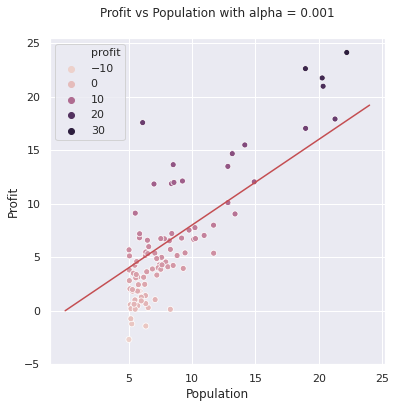

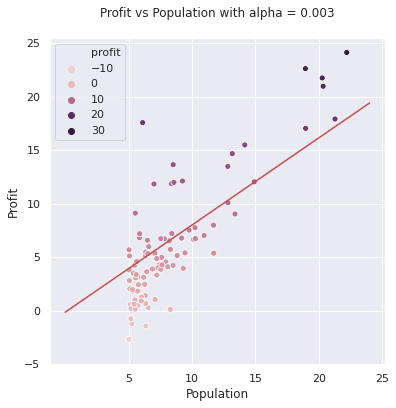

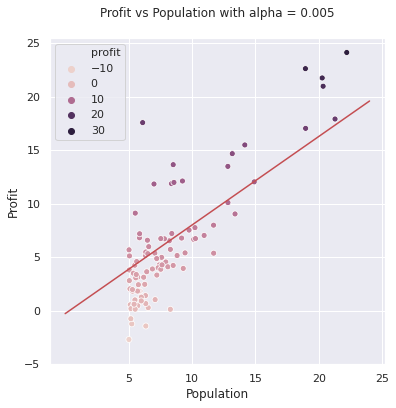

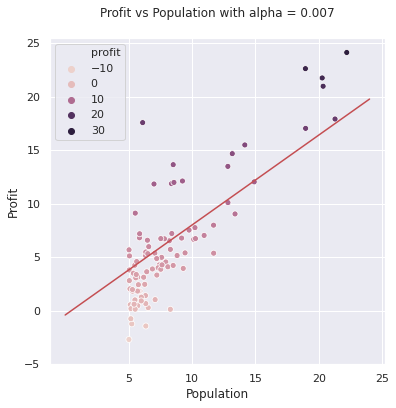

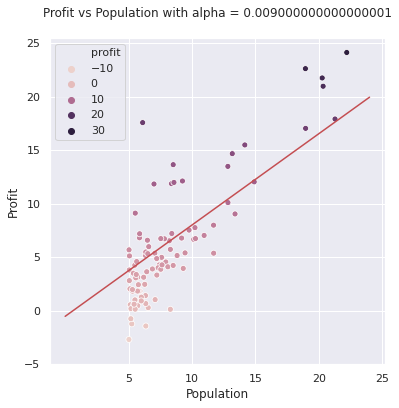

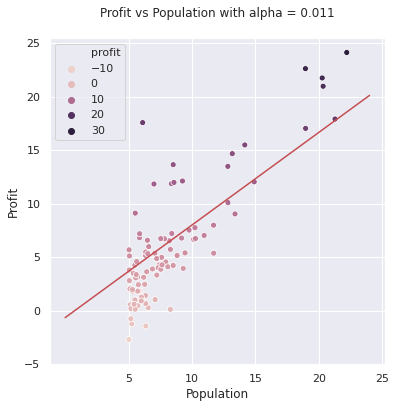

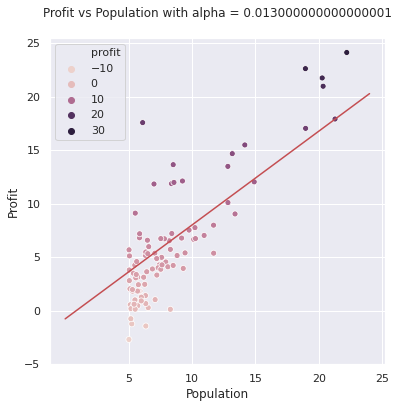

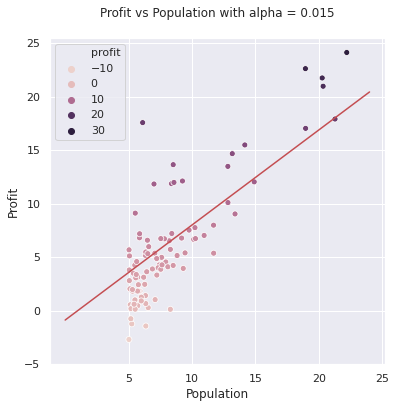

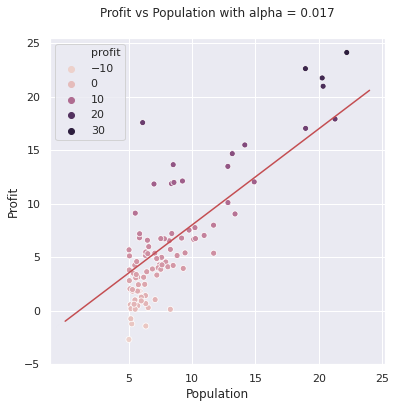

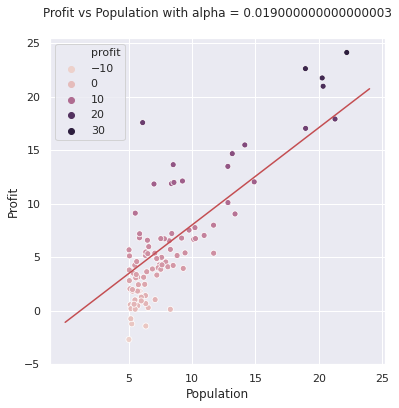

In [9]:
t=0
for i in alphas:
    func(t)
    t=t+1

# Visualizing Cost Function

In [11]:
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

ax_x = np.arange(1,125,1.25)
ax_y = alphas
ax_z= j_vals
len(ax_x)


import plotly.graph_objects as go
fig = go.Figure(data=go.Contour(x=ax_x, y=ax_y, z=ax_z,contours=dict(coloring='lines',showlabels=True,),line_width=3))

fig.show(renderer="colab")


# Inference

If slope is +ve : $\theta$j = $\theta$j – (+ve value). Hence value of $\theta$j decreases. <br >
If slope is -ve : $\theta$j = $\theta$j – (-ve value). Hence value of $\theta$j increases. <br >
The choice of correct learning rate is very important as it ensures that Gradient Descent converges in a reasonable time:
<br >- If we choose α to be very large, Gradient Descent can overshoot the minimum. It may fail to converge or even diverge.
<br >- 	If we choose α to be very small, Gradient Descent will take small steps to reach local minima and will take a longer time to reach minima.
